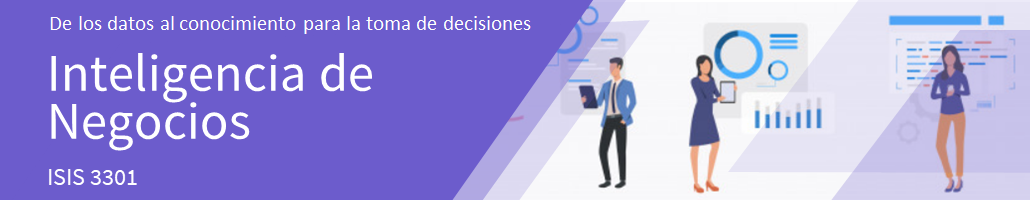

## Tarea de clasificación.

El objetivo de este notebook es mostrar cómo resolver una tarea de clasificación utilizando la librería scikit-learn. Tomaremos como caso de estudio el conjunto de canciones y veremos cómo realizar la preparación de los datos para el algoritmo de árboles de decisión. También conocerás algunas métricas para evaluar un modelo de clasificación y cómo estimar su capacidad de generalización. Además, veremos cómo ajustar los hiperparámetros del algoritmo con técnicas de validación. 
Se explicará paso a paso:

0. Proceso general
1. Preparar los datos para el modelado.
2. Crear un modelo de árbol de decisión.
3. Utilizar técnicas de validación para el ajuste de hiperparámetros propios de árboles de decisión.
4. Evaluar el modelo.
5. Interpretar el modelo con base en los objetivos de negocio.

### 0. Proceso general

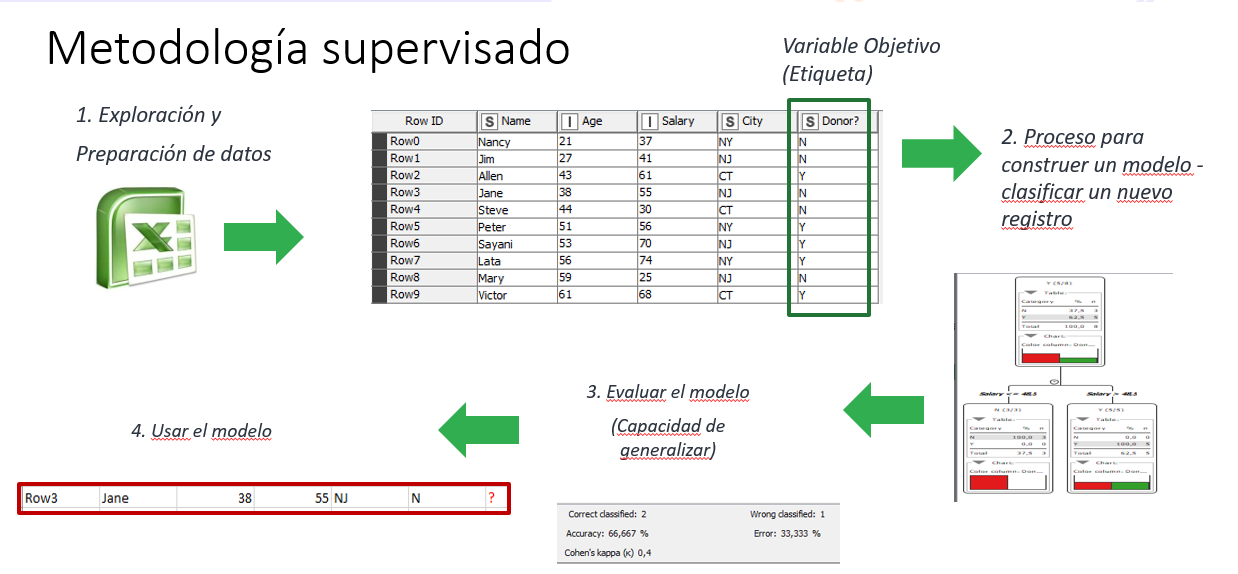

### 1. Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [3]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree

### 2. Carga de los datos
A través de la librería **pandas** podemos realizar la carga de datos desde diferentes fuentes de información, en este caso se realizará la carga de un archivo plano csv (archivo separado por comas).

In [4]:
# Se cargan los datos. 
df_tracks=pd.read_csv('Clasificacion_PrepTracks.csv', sep=',', encoding = 'utf-8', index_col=0)

In [5]:
# Cantidad de datos y número de variables
df_tracks.shape

(100000, 22)

In [6]:
# Mostrar los datos
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,loudness,mode,decibel_range,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,first_artist,second_artist
280776,1P2kvbKXc8lomaeMoS1GPd,Tipota Den Pai Hameno,6.0,246467,0.0,"[""Haris Alexiou""]",['4cgCxnsmy9kDcl3oA2BYRY'],1979-05-02,0.399,0.397,-10.659,m,NaN,0.0260,0.638,0.000000,0.1170,0.475,93.146,4.0,Haris Alexiou,NaN
413741,3cfsrtjbPNbgcmgSRsJgbN,Tu Enamorado,34.0,157800,0.0,"[""José Alfredo Jimenez""]",['2T06whb4s6UiufL1j5Qtz9'],1999-12-31,0.454,0.470,-10.255,M,NaN,0.0413,0.793,0.000000,0.0750,0.857,148.411,3.0,José Alfredo Jimenez,NaN
347767,2yuyaYAELoMG4ApV5wJsWR,Curve (feat. The Weeknd),62.0,161990,1.0,"[""Gucci Mane"", ""The Weeknd""]","['13y7CgLHjMVRMDqxdx0Xdo', '1Xyo4u8uXC1ZmMpatF...",2017-10-13,0.760,0.476,-8.103,M,NaN,0.2410,0.294,0.000000,0.1000,0.354,147.010,4.0,Gucci Mane,The Weeknd
25439,4dyemWgZn8CG9qneSpcQA3,Tennessee Waltz,12.0,179293,0.0,"[""Pee Wee King & His Golden West Cowboys""]",['3iywlJzFl8iYgp3112qt31'],1952-06-13,0.541,0.153,-15.171,M,NaN,0.0352,0.912,0.000290,0.0979,0.675,114.834,3.0,Pee Wee King & His Golden West Cowboys,NaN
65901,4J2nhinyaIxkoGh9vw5UbI,Have I Told You Lately - Live Unplugged; 2008 ...,47.0,243947,0.0,"[""Rod Stewart""]",['2y8Jo9CKhJvtfeKOsYzRdT'],1993-05-01,0.476,0.331,-14.461,M,NaN,0.0427,0.792,0.000004,0.7160,0.315,66.825,4.0,Rod Stewart,NaN


In [7]:
# Podemos ver los tipos de todas la variables.
df_tracks.dtypes

id                   object
name                 object
popularity          float64
duration_ms           int64
explicit            float64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
loudness            float64
mode                 object
decibel_range       float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
first_artist         object
second_artist        object
dtype: object

In [8]:
# Y hacer una descripción de los datos
df_tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,loudness,decibel_range,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,99910.000000,1.000000e+05,99908.000000,99909.000000,99907.000000,99893.000000,155.000000,99901.000000,99911.000000,99900.000000,99907.000000,99900.000000,99898.000000,99909.000000
mean,27.478090,2.324164e+05,0.045732,0.562213,0.542298,-10.150200,47.709677,0.092128,0.449463,0.114129,0.209558,0.551855,118.656852,3.880371
std,18.480398,1.249293e+05,0.208904,0.166364,0.252587,5.065804,29.896785,0.151199,0.349990,0.266812,0.181309,0.258919,29.701265,0.456019
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1.775600e+05,0.000000,0.451000,0.343000,-12.805000,21.000000,0.033800,0.094900,0.000000,0.097600,0.343000,95.880250,4.000000
50%,27.000000,2.160400e+05,0.000000,0.574000,0.550000,-9.181000,49.000000,0.043700,0.420000,0.000029,0.136000,0.563000,117.693000,4.000000
75%,41.000000,2.646000e+05,0.000000,0.685000,0.749000,-6.457000,73.500000,0.072900,0.787000,0.011100,0.269000,0.772000,136.513750,4.000000
max,90.000000,4.685927e+06,1.000000,0.987000,1.000000,2.572000,99.000000,0.971000,0.996000,1.000000,1.000000,1.000000,243.759000,5.000000


In [9]:
# Se observa que hay ausencias, en particular en la variable "decibel_range". Veamos cuantas, para todas las variables:
df_tracks.isnull().sum()

id                    107
name                  112
popularity             90
duration_ms             0
explicit               92
artists                 0
id_artists              0
release_date           89
danceability           91
energy                 93
loudness              107
mode                  106
decibel_range       99845
speechiness            99
acousticness           89
instrumentalness      100
liveness               93
valence               100
tempo                 102
time_signature         91
first_artist           12
second_artist       81631
dtype: int64

### 2. Limpieza y preparación de los datos

Primero vamos a ejecutar los pasos de limpieza de los datos, relacionados el tratamiento de ausencias y registros duplicados.

In [10]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
df_tracks_t = df_tracks
# Primero eliminaremos aquellas variables con muchas ausencias.
df_tracks_t = df_tracks_t.drop(['decibel_range', 'second_artist'], axis=1)

In [11]:
# Eliminación registros con ausencias
#¿Porqué realizar este paso?
df_tracks_t = df_tracks_t.dropna()
# Eliminación de registros duplicados.
df_tracks_t = df_tracks_t.drop_duplicates()

En este punto es importante reflexionar en otra alternativa para no perder registros por celdas con valores nulos. ¿Cuándo tendrá sentido utilizar una estrategia distinta a eliminar los registros?

In [12]:
df_tracks_t.describe()

,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,98444.000000,9.844400e+04,98444.000000,98444.000000,98444.000000,98444.000000,98444.000000,98444.000000,98444.000000,98444.000000,98444.000000,98444.000000,98444.000000
mean,27.486784,2.325329e+05,0.045772,0.562287,0.542271,-10.150875,0.092169,0.449384,0.114122,0.209445,0.551951,118.659047,3.880206
std,18.485311,1.253449e+05,0.208992,0.166383,0.252530,5.067440,0.151327,0.349963,0.266765,0.181198,0.258981,29.703454,0.455938
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1.775600e+05,0.000000,0.451000,0.344000,-12.807000,0.033800,0.094800,0.000000,0.097600,0.343000,95.883000,4.000000
50%,27.000000,2.161070e+05,0.000000,0.574000,0.550000,-9.181000,0.043700,0.419000,0.000029,0.136000,0.564000,117.693000,4.000000
75%,41.000000,2.646800e+05,0.000000,0.685000,0.749000,-6.455000,0.072900,0.787000,0.011100,0.269000,0.772000,136.508500,4.000000
max,90.000000,4.685927e+06,1.000000,0.987000,1.000000,2.572000,0.971000,0.996000,1.000000,1.000000,1.000000,243.759000,5.000000


In [13]:
# Cantidad de datos y número de variables
df_tracks_t.shape

(98444, 20)

Es muy importante analizar el objetivo del modelo analítico a construir antes de iniciar a tomar decisiones. En este caso, por ejemplo, se debe aplicar la regla dada por el negocio, sobre qué significa una canción popular y que no, para generar la nueva variable que será la clase (variable objetivo).

Esta nueva columna la derivaremos a partir de la variable "popularity" utilizando un umbral que nos permita determinar cuándo una canción es popular. Si el valor en esta variable es mayor que el umbral entonces ese registro se clasifica como "popular" y será indicado con un "1", de lo contrario será "no popular y esta categoría la representaremos con un "0".

In [14]:
# Podemos ver los estadísticos de la variable "popularity"
df_tracks_t['popularity'].describe()

count    98444.000000
mean        27.486784
std         18.485311
min          0.000000
25%         12.000000
50%         27.000000
75%         41.000000
max         90.000000
Name: popularity, dtype: float64

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


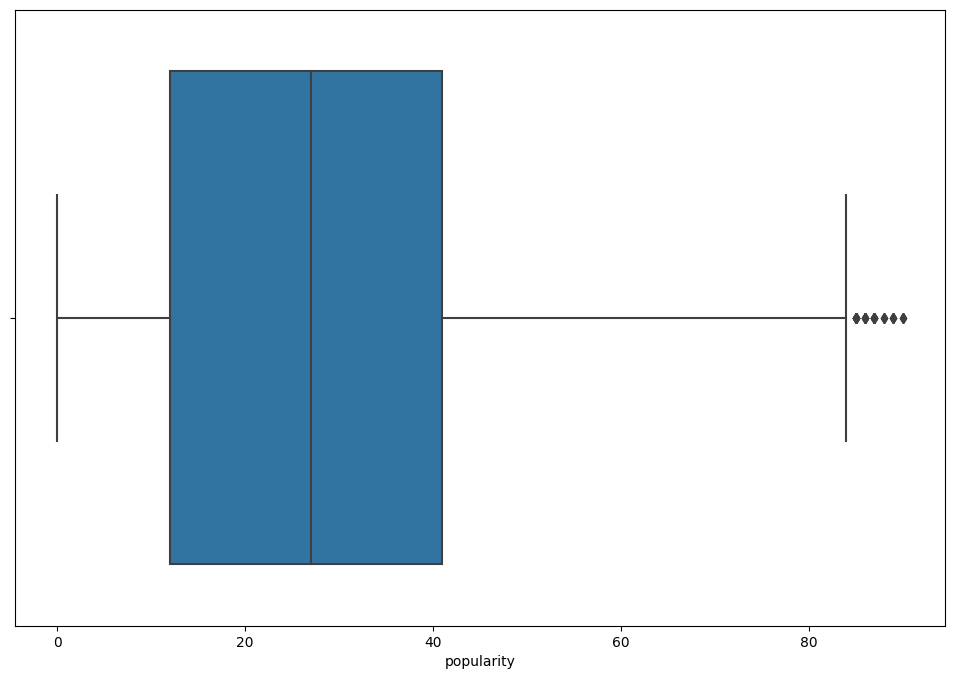

In [15]:
#El observar las variables de forma gráfica puede ayudar al negocio a decidir el punto a partir del cual se tienen canciones populares.
fig=plt.figure(figsize=(12,8))
ax = sns.boxplot("popularity", data=df_tracks_t, orient="v")

In [16]:
# Ahora definimos la función que nos va a permitir construir nuestra clase.
def label_popularity (row):
    if row['popularity'] > 33 :
      return 1
    return 0
df_tracks_t['popularity_label']=df_tracks_t.apply (lambda row: label_popularity(row), axis=1)    

In [17]:
df_tracks_t.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,first_artist,popularity_label
280776,1P2kvbKXc8lomaeMoS1GPd,Tipota Den Pai Hameno,6.0,246467,0.0,"[""Haris Alexiou""]",['4cgCxnsmy9kDcl3oA2BYRY'],1979-05-02,0.399,0.397,-10.659,m,0.0260,0.638,0.000000,0.1170,0.475,93.146,4.0,Haris Alexiou,0
413741,3cfsrtjbPNbgcmgSRsJgbN,Tu Enamorado,34.0,157800,0.0,"[""José Alfredo Jimenez""]",['2T06whb4s6UiufL1j5Qtz9'],1999-12-31,0.454,0.470,-10.255,M,0.0413,0.793,0.000000,0.0750,0.857,148.411,3.0,José Alfredo Jimenez,1
347767,2yuyaYAELoMG4ApV5wJsWR,Curve (feat. The Weeknd),62.0,161990,1.0,"[""Gucci Mane"", ""The Weeknd""]","['13y7CgLHjMVRMDqxdx0Xdo', '1Xyo4u8uXC1ZmMpatF...",2017-10-13,0.760,0.476,-8.103,M,0.2410,0.294,0.000000,0.1000,0.354,147.010,4.0,Gucci Mane,1
25439,4dyemWgZn8CG9qneSpcQA3,Tennessee Waltz,12.0,179293,0.0,"[""Pee Wee King & His Golden West Cowboys""]",['3iywlJzFl8iYgp3112qt31'],1952-06-13,0.541,0.153,-15.171,M,0.0352,0.912,0.000290,0.0979,0.675,114.834,3.0,Pee Wee King & His Golden West Cowboys,0
65901,4J2nhinyaIxkoGh9vw5UbI,Have I Told You Lately - Live Unplugged; 2008 ...,47.0,243947,0.0,"[""Rod Stewart""]",['2y8Jo9CKhJvtfeKOsYzRdT'],1993-05-01,0.476,0.331,-14.461,M,0.0427,0.792,0.000004,0.7160,0.315,66.825,4.0,Rod Stewart,1


In [18]:
# Cantidad de datos de cada clase
pd.value_counts(df_tracks_t['popularity_label'])

0    61171
1    37273
Name: popularity_label, dtype: int64

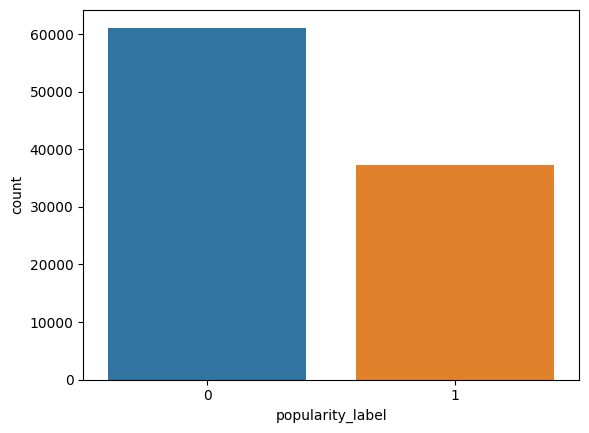

In [19]:
ax = sns.countplot(x='popularity_label', data=df_tracks_t)

In [20]:
# Eliminaremos las variables que consideramos no son útiles para la tarea que queremos resolver, como los identificadores.
df_tracks_t = df_tracks_t.drop(['id', 'id_artists'], axis=1)

Un aspecto muy importante para tener en cuenta son los requerimientos de entrada de los algoritmos de aprendizaje implementados en las librerías utilizadas. En particular, scikit-learn requiere que todos los atributos sean numéricos y que la variable objetivo, en una tarea de clasificación, esté codificada con números.

In [21]:
# Vamos a seleccionar de nuestro conjunto solo los atributos numéricos.
number_cols = df_tracks_t.dtypes[(df_tracks_t.dtypes == np.int64) | (df_tracks_t.dtypes == np.float64)].index 
number_cols = df_tracks_t.select_dtypes(include = ['int64','float']).columns
number_cols

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'popularity_label'],
      dtype='object')

In [22]:
df_tracks_m = df_tracks_t[number_cols]

In [23]:
# Podemos ver como quedaron los datos
df_tracks_m.head()

,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_label
280776,6.0,246467,0.0,0.399,0.397,-10.659,0.0260,0.638,0.000000,0.1170,0.475,93.146,4.0,0
413741,34.0,157800,0.0,0.454,0.470,-10.255,0.0413,0.793,0.000000,0.0750,0.857,148.411,3.0,1
347767,62.0,161990,1.0,0.760,0.476,-8.103,0.2410,0.294,0.000000,0.1000,0.354,147.010,4.0,1
25439,12.0,179293,0.0,0.541,0.153,-15.171,0.0352,0.912,0.000290,0.0979,0.675,114.834,3.0,0
65901,47.0,243947,0.0,0.476,0.331,-14.461,0.0427,0.792,0.000004,0.7160,0.315,66.825,4.0,1


In [24]:
# Revisión del total de registros
df_tracks_m.shape

(98444, 14)

### 3. Construcción del modelo

Los algoritmos supervisados implementados en scikit-learn requieren que las variables de entrada estén separadas de la variable objetivo. 

In [25]:
# Se selecciona la variable objetivo, en este caso "Popularity_label".
Y = df_tracks_m['popularity_label']
# Del conjunto de datos se elimina la variable "Popularity_label"
X = df_tracks_m.drop(['popularity_label'], axis=1)

In [26]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [27]:
# Crear el objeto de arbol de decisión. Utilicemos como criterio de pureza la entropía.
arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [28]:
# Entrenar el modelo de arbol de decisión con los datos de entrenamiento
arbol = arbol.fit(X_train,Y_train)

Para determinar el rendimiento del modelo podemos en primer lugar, generar la matriz de confusión.

In [29]:
# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = arbol.predict(X_test)

In [30]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[12261,     0],
       [    0,  7428]], dtype=int64)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


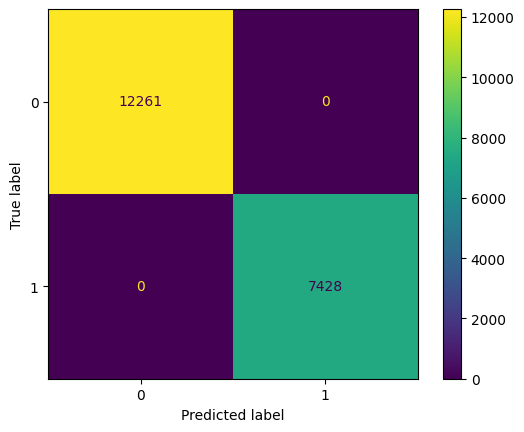

In [31]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol, X_test, Y_test)  
plt.show()  

También podemos generar diferentes métricas de rendimiento como la excatitud, el recall, la precisión y la puntuación F1.  Entendamos cada una de ellas.
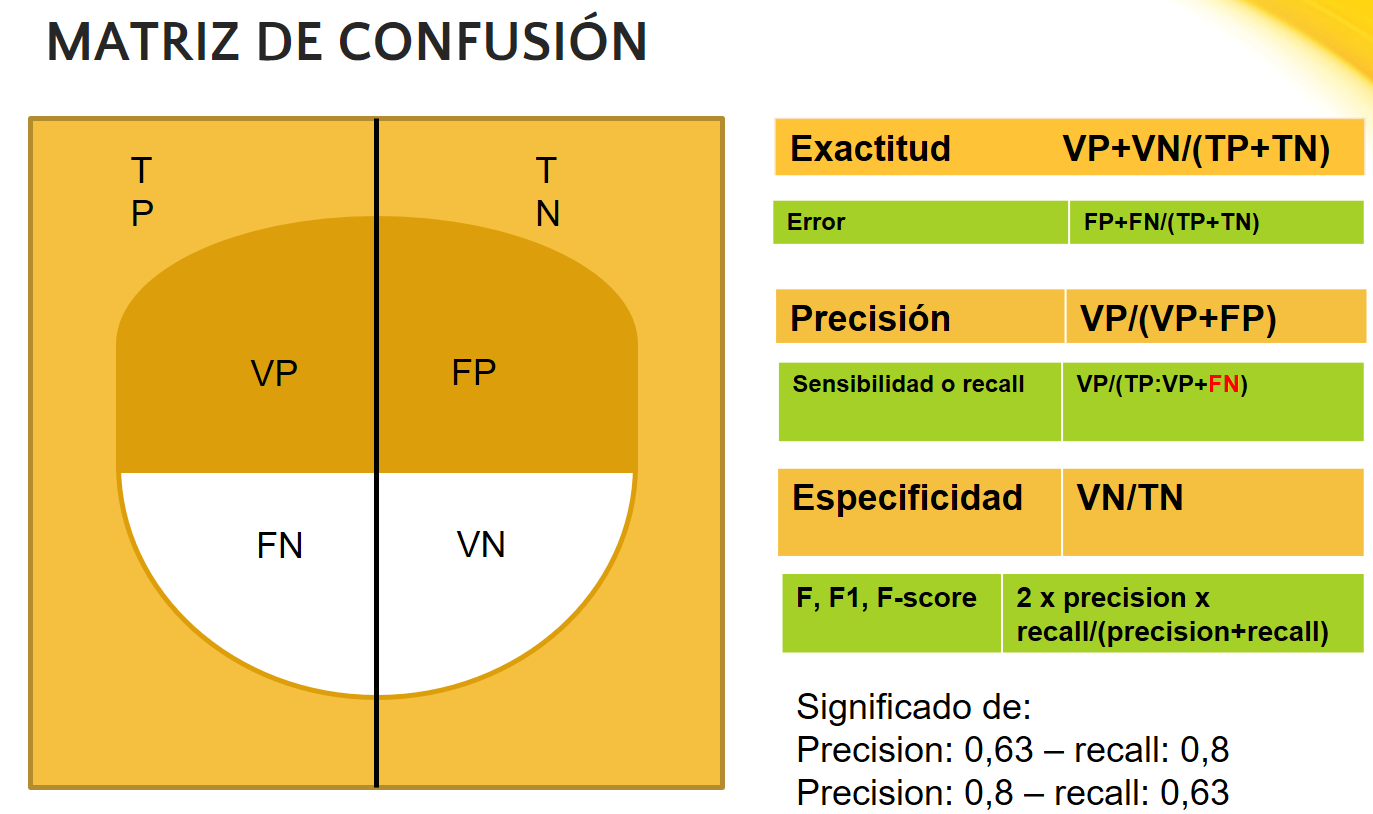

In [32]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 1.00
Recall: 1.0
Precisión: 1.0
Puntuación F1: 1.0


Para tener una panorama completo podemos generar un reporte.

In [33]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12261
           1       1.00      1.00      1.00      7428

    accuracy                           1.00     19689
   macro avg       1.00      1.00      1.00     19689
weighted avg       1.00      1.00      1.00     19689



Cuando tenemos una predicción exacta, hay que revisar el modelo porque indica un posible error. ¿Tendremos alguna columna que se utilizó para calcular la variable objetivo, dentro de la variables de entrada? Si es así, repite los pasos iniciales del punto 2, una vez removida la columna o columnas con problema.

In [34]:
# Vamos a corregir el problema y volvamos a construir nuestro modelo, pero recuerda que este paso de eliminación de
# variables debes hacerlo en la fase de preparación de datos.
X = df_tracks_m.drop(['popularity_label', 'popularity'], axis=1)

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)
arbol = arbol.fit(X_train,Y_train)
y_pred = arbol.predict(X_test)
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.63
Recall: 0.5125201938610663
Precisión: 0.5162033898305085
Puntuación F1: 0.5143551982706208


In [36]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71     12261
           1       0.52      0.51      0.51      7428

    accuracy                           0.63     19689
   macro avg       0.61      0.61      0.61     19689
weighted avg       0.63      0.63      0.63     19689



In [37]:
# Calculemos también las métricas de rendimiento sobre el conjunto de entrenamiento.
y_pred = arbol.predict(X_train)
print('Exactitud: %.2f' % accuracy_score(Y_train, y_pred))
print("Recall: {}".format(recall_score(Y_train,y_pred)))
print("Precisión: {}".format(precision_score(Y_train,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_train,y_pred)))

Exactitud: 1.00
Recall: 0.9975875356006031
Precisión: 0.9999664136494928
Puntuación F1: 0.9987755581274426


In [38]:
# Mostrar reporte de clasificación
print(classification_report(Y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48910
           1       1.00      1.00      1.00     29845

    accuracy                           1.00     78755
   macro avg       1.00      1.00      1.00     78755
weighted avg       1.00      1.00      1.00     78755



Observa que hay un gran diferencia en los valores de las métricas de rendimiento sobre el conjunto de entrenamiento y sobre el conjunto test ¿Por qué crees que se produce este fenómeno?

### 4. Interpretación del modelo.
Podemos determinar cuáles atributos son los más importantes a partir del modelo generado. Recuerda que estos algoritmos realizan una selección en cada paso de construcción del árbol con base en la medida de pureza.

In [39]:
# Obtener la importancia de las variables. Para esto podemos utilizar uno de los atributos del modelo "feature_importances_", el
# cual nos devuelve un coeficiente o peso para cada atributo: mientras más grande sea este más importante será la variable
# asociada.
importancia= arbol.feature_importances_
importancia

array([0.10370395, 0.01281308, 0.0921144 , 0.08618101, 0.15372444,
       0.09401614, 0.12064992, 0.05908293, 0.08841328, 0.09416623,
       0.08898791, 0.00614671])

In [40]:
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,loudness,0.153724
1,acousticness,0.120650
2,duration_ms,0.103704
3,valence,0.094166
4,speechiness,0.094016
5,danceability,0.092114
6,tempo,0.088988
7,liveness,0.088413
8,energy,0.086181
9,instrumentalness,0.059083


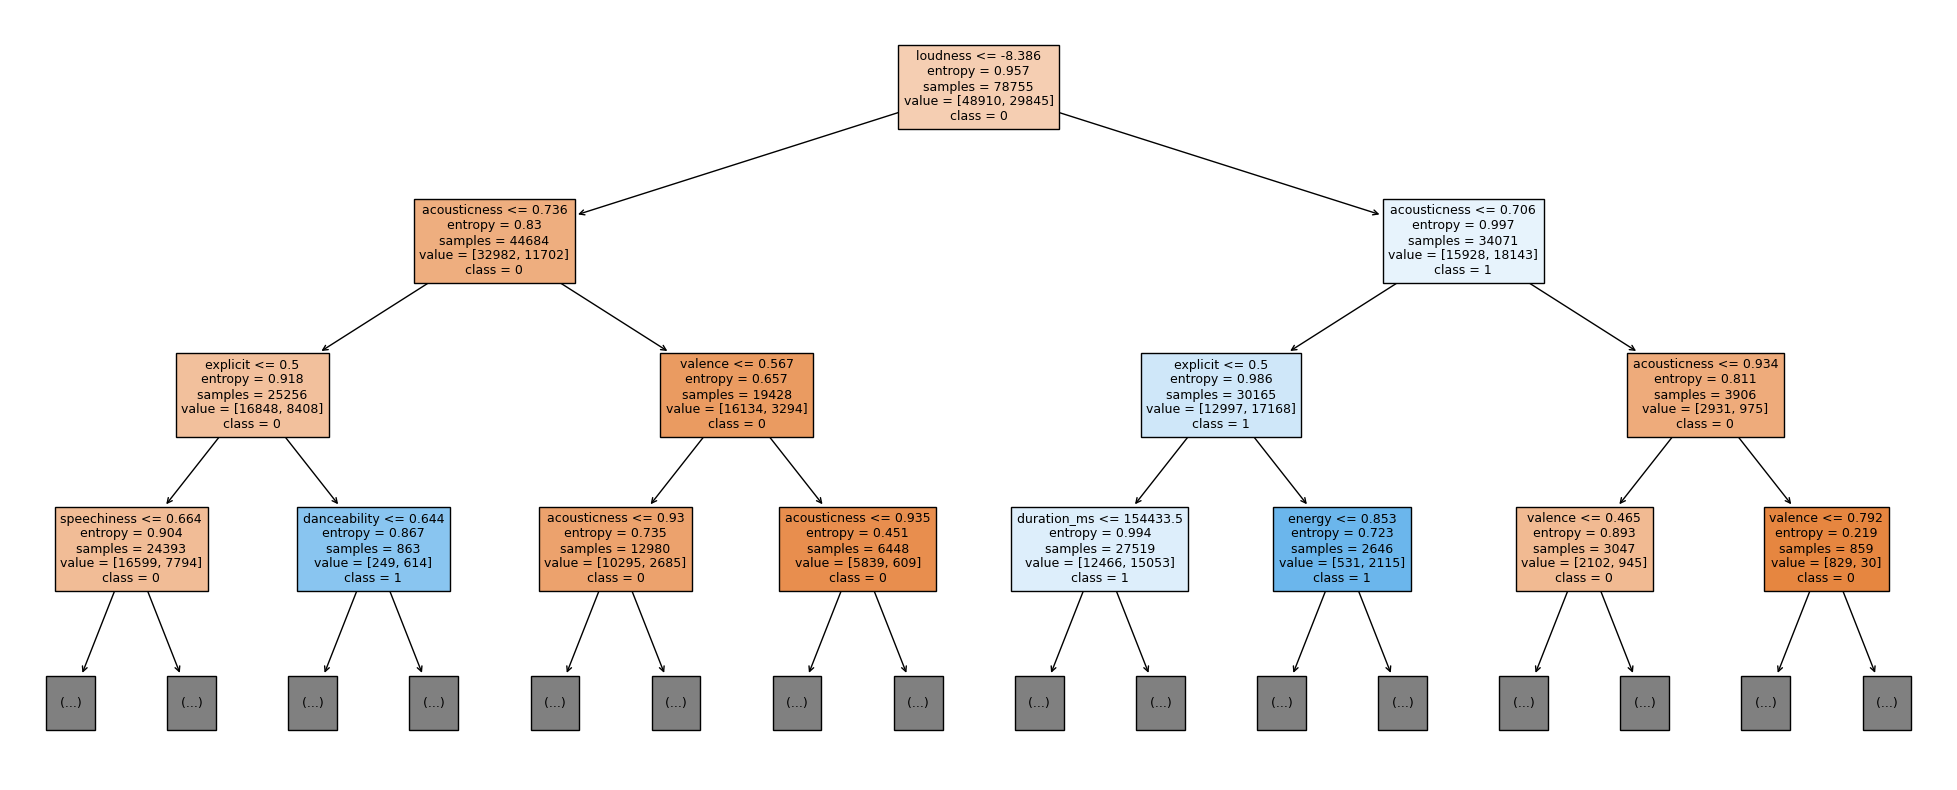

In [41]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol, max_depth=3, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9)

In [42]:
# También podemos guardar esta figura como una imagen.
fig.savefig("decistion_tree.png")

### 5. Construcción del modelos con búsqueda de hiperparámetros.
En el caso de los árboles de decisión los hiperparámetros principales que hay que ajustar están relacionados con aquellos que controlan la complejidad, pero también el criterio o medida de pureza puede afectar su rendimiento. En general, estos son:  

* **criterion** : {“gini”, “entropy”}, predeterminado = "gini".

La función para medir la calidad de una división. Los criterios admitidos son "gini" y "entropía".

* **max_depth:** int, predeterminado=None.

La profundidad máxima del árbol. Si es None, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_samples_split muestras.

* **min_samples_split** : int or float, predeterminado=2.

El número mínimo de muestras necesarias para dividir un nodo interno



¿Cómo saber los mejores valores de los hiperparámetro de un algoritmo? Estos hay que ajustarlo a los datos y no podemos utilizar el conjunto test para realizar esta tarea. Debemos entonces recurrir a las técnicas de validación las cuales, en general, puedes implementarlas de dos maneras: utilizando un conjunto de validación o empleando la validación cruzada de k particiones (k-fold cross validation).

a) Con un conjunto de validación. Si utilizas esta vía el conjunto de entrenamiento hay que dividirlo en dos: uno para la construcción del modelo (sería el nuevo conjunto de entrenamiento) y el otro para la validación (para determinar los valores de los hiperparámetros y complejidad). 

Veamos cómo hacerlo.

In [43]:
# Dividimos el conjunto de entrenamiento en dos: una para la construcción del modelo (sería el nuevo conjunto de 
# entrenamiento) y otro para la validación, el cuál será utilizado para determinar el rendimiento del modelo con una
# combinación específica de hiperparámetros.
X_trainval, X_val, Y_trainval, Y_val = train_test_split(X_train, Y_train, test_size = 0.15, random_state = 0)

In [44]:
# Fijemos un valor de max_depth en 2, construyamos el modelo y probemos sobre validación. Utilicemos la exactitud como métrica 
# de rendimiento para hacer la selección.
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 4, random_state=0)
arbol = arbol.fit(X_train,Y_train)

In [45]:
# Determinemos los valores de exactitud sobre entrenamiento y test
y_pred_train = arbol.predict(X_train)
y_pred_test = arbol.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.69
Exactitud sobre test: 0.69


In [46]:
# Ahora probemos con otro valor de profundidad de árbol.
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 6, random_state=0)
arbol = arbol.fit(X_train,Y_train)

In [47]:
# Determinemos los valores de exactitud sobre entrenamiento y test
y_pred_train = arbol.predict(X_train)
y_pred_test = arbol.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.70
Exactitud sobre test: 0.69


In [48]:
# Probemos con otros valores
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 8, random_state=0)
arbol = arbol.fit(X_train,Y_train)

In [49]:
# Determinemos los valores de exactitud sobre entrenamiento y test
y_pred_train = arbol.predict(X_train)
y_pred_test = arbol.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.71
Exactitud sobre test: 0.70


In [50]:
# Probemos con otros valores
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 10, random_state=0)
arbol = arbol.fit(X_train,Y_train)

In [51]:
# Determinemos los valores de exactitud sobre entrenamiento y test
y_pred_train = arbol.predict(X_train)
y_pred_test = arbol.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.72
Exactitud sobre test: 0.70


In [52]:
# Probemos con otros valores
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 20, random_state=0)
arbol = arbol.fit(X_train,Y_train)

In [53]:
# Determinemos los valores de exactitud sobre entrenamiento y test
y_pred_train = arbol.predict(X_train)
y_pred_test = arbol.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.87
Exactitud sobre test: 0.66


¿Cuál crees que debería ser la máxima profundidad del árbol para nuestro problema?

Ahora utilicemos la otra opción.

b) Validación cruzada de k-particiones. En este caso el conjunto de entrenamiento se divide en k particiones disyuntas. Luego, se fija un valor de hiperparámetro y se toma como conjunto de validación la primera partición y el resto para entrenar el modelo. Este proceso se repite para cada partición. Al finalizar, se determina el valor promedio de las métricas seleccionadas. Este ciclo se repite sobre diferentes valores del hiperparámetro y se seleccionan aquel que ofrezcan el mejor rendimiento. 

Scikit-learn ofrece algunos métodos que automatizan el proceso de buscar los valores de los hiperparámetros. Uno de ellos es GridSearchCV, el cual se basa en la validación cruzada de k-particiones. Veamos cómo utilizarlo.

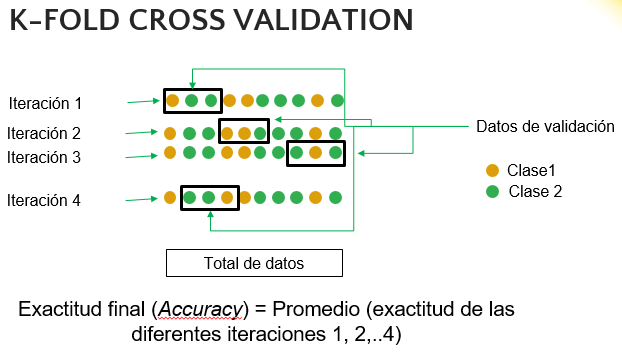

In [54]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [55]:
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,20],'min_samples_split':[2, 3, 4, 5]}

In [56]:
# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol = DecisionTreeClassifier(random_state=0)

In [57]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'min_samples_split': [2, 3, 4, 5]})

In [58]:
# Podemos ver cuál fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 3}

In [59]:
# Obtener el mejor modelo.
arbol_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = arbol_final.predict(X_train)
y_pred_test = arbol_final.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.71
Exactitud sobre test: 0.70


In [60]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78     12261
           1       0.64      0.47      0.54      7428

    accuracy                           0.70     19689
   macro avg       0.68      0.65      0.66     19689
weighted avg       0.69      0.70      0.69     19689



### 6. Predicciones y probabilidad

Una vez obtenido el modelo de árbol de decisión también podríamos obtener la probabilidad de que un dato sea clasificado como de una clase particular. 

In [61]:
# Por ejemplo, tomemos un dato del conjunto de test y apliquemos el método "predict_proba".
y_pred_test = arbol_final.predict_proba(X_test.iloc[[105]])

In [62]:
print(y_pred_test)

[[0.72207017 0.27792983]]


In [63]:
# Para saber el orden de las clases puedes utilizar el atributo "classes_" del modelo:
arbol_final.classes_

array([0, 1], dtype=int64)

Como pudiste observar cuando creamos la variable clase, el conjunto de datos está desbalanceado ¿Qué podríamos hacer para manejar este problema y lograr mejorar el rendimiento de nuestro modelo sobre la clase minoritaria? Investiga las opciones que ofrece scikit-learn en el caso de árboles de decisión y construye un nuevo modelo con base en estas opciones.

Determina si el incluir otras variables como la fecha, pueden mejorar la calidad del modelo construido.

### 7. Modelo k-NN.


In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh = neigh.fit(X_train, Y_train)

[[9319 2942]
 [5119 2309]]


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

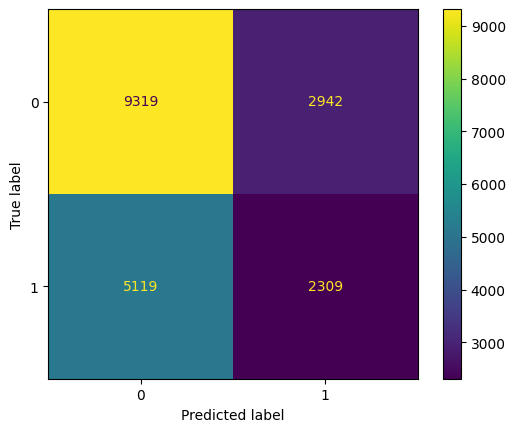

In [141]:
y_pred_knn = neigh.predict(X_test)
print(confusion_matrix(Y_test, y_pred_knn))
plot_confusion_matrix(neigh, X_test, Y_test)
plt.show


In [142]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred_knn))
print("Recall: {}".format(recall_score(Y_test,y_pred_knn)))
print("Precisión: {}".format(precision_score(Y_test,y_pred_knn)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred_knn)))

Exactitud: 0.59
Recall: 0.31085083467959074
Precisión: 0.43972576652066275
Puntuación F1: 0.3642243079107185
